### EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

In [2]:
dataset = pd.read_csv('../data/train_ship_segmentations_v2.csv/train_ship_segmentations_v2.csv')

In [3]:
dataset.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


According to description to this task this table contain image file names and the information about ship locations. Locations are encoded in a format of `start and run` pairs.  
  
`Start` - sequence number of pixel in flatten image  
`Run` - number of following pixels that are a part of a ship.

In [4]:
dataset.shape

(231723, 2)

Group ships from the same image together 

In [5]:
groupred_by_image_dataset = dataset.groupby('ImageId').aggregate('count')
groupred_by_image_dataset.head(15)

,EncodedPixels
ImageId,
00003e153.jpg,0
0001124c7.jpg,0
000155de5.jpg,1
000194a2d.jpg,5
0001b1832.jpg,0
00021ddc3.jpg,9
0002756f7.jpg,2
0002d0f32.jpg,0
000303d4d.jpg,0


Now we can get the amount of images with ships and without them 

In [12]:
print(f"Amount of images without ships - {len(groupred_by_image_dataset[groupred_by_image_dataset['EncodedPixels']==0])}")
print(f"Amount of images that contain at least 1 ship - {len(groupred_by_image_dataset[groupred_by_image_dataset['EncodedPixels']>0])}")

Amount of images without ships - 150000
Amount of images that contain at least 1 ship - 42556


Next, apply Counter function to get the distribution of ships number 

In [13]:
ships_per_image = Counter(groupred_by_image_dataset['EncodedPixels'])

Plot this information of a bar plot

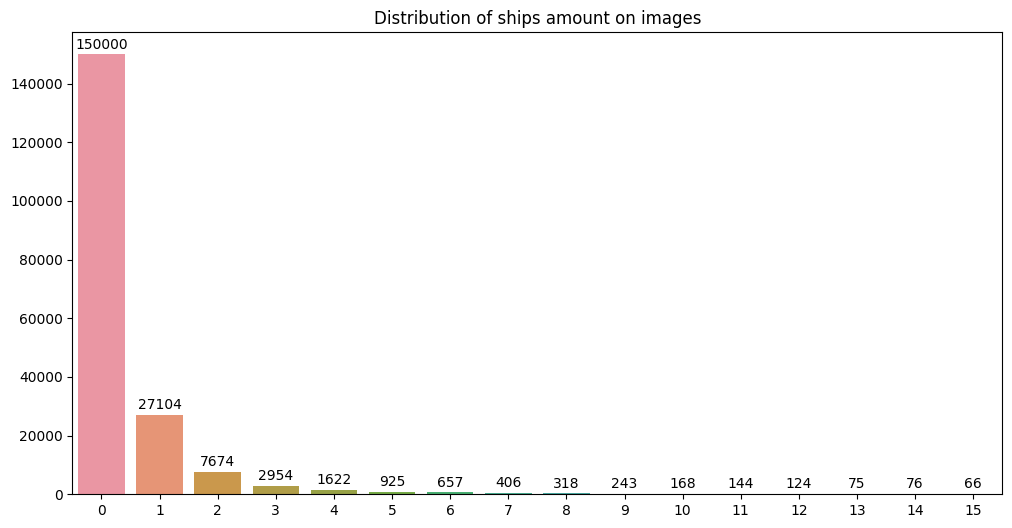

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
barchart = sns.barplot(x=list(ships_per_image.keys()), y=list(ships_per_image.values()), ax=ax)

barchart.bar_label(ax.containers[0], label_type='edge', padding=2)
plt.title(label='Distribution of ships amount on images')
plt.show()

### **Conclusions:**

- Each row in a .csv file contain information about ship on the image. The encoding format is `start & run` that needs to be converted to mask format;

- Vast majority of images don't contain any ships at all;  

- Totally, we have `150k` images with no ships on them and `42556` images with ships (from 1 to 15 instances on each);   
 
- For image segmentation we want to classify each pixel to one of the label class (binary in this case: either `ship` or `not ship`). 